In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import agate
import math
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [13]:
original_data=pd.read_csv("Cleaned_Monthly1706.csv", encoding = "ISO-8859-1")
original_data.head()

,articleType,article_id,byline,seo_url,sectionPath,collatedTags,blogType,webHeadline,publishDate,lastModified,Sum,cleaned_byline
0,BlogArticle,2261973,"By Steve Persall, Times Movie Critic",jackson-browne-in-concert-on-his-friend-collab...,NaN,"breaking news, soundcheck, things to do",soundcheck,"Jackson Browne pays tribute to friend, collabo...",2016-01-20T04:04:57+00:00,2016-01-20T22:40:37+00:00,7,STEVE PERSALL
1,StaffArticle,2261506,"By Greg C. Truax and Barry Edwards, special to...",column-why-independent-voters-dont-decide-elec...,opinion/columns,"Opinion, Columns, top-news",NaN,Column: Why independent voters don't decide el...,2016-01-15T20:06:47+00:00,2016-01-17T20:58:00+00:00,3,"GREG C. TRUAX, BARRY EDWARDS"
2,StaffArticle,2261551,"By Mike Hale, New York Times",review-usas-new-sci-ficonspiracy-series-colony...,features/media,"Features, TV & Media",NaN,Review: USA's new sci-fi/conspiracy series 'Co...,2016-01-15T22:45:59+00:00,2016-01-17T23:42:13+00:00,2,NaN
3,BlogArticle,2261675,Alex Leary,rubio-buys-another-gun-links-to-isis,NaN,"jebio, jeb-bush, marco-rubio, breaking-news",the-buzz-florida-politics,"Rubio buys another gun, links to ISIS",2016-01-17T19:18:22+00:00,2016-01-18T00:17:42+00:00,1,ALEX LEARY
4,StaffArticle,2261611,"By Greg Auman, Times Staff Writer",coaching-is-in-new-bucs-coach-dirk-koetters-blood,sports/football/bucs,"Sports, Football, Bucs, breaking-news, top-new...",NaN,Coaching is in Dirk Koetter's blood,2016-01-16T21:52:10+00:00,2016-01-17T05:15:43+00:00,2,GREG AUMAN


In [14]:
# OVERVIEW OF PAGEVIEWS FOR ALL ARTICLES

In [15]:
original_sorted_by_pageView = original_data.sort_values(by=('Sum'), ascending=False)
times_produced_only = original_sorted_by_pageView[original_sorted_by_pageView['cleaned_byline'] != None]
times_produced_only.index=times_produced_only.index.astype(str)
times_produced_only.head()

,articleType,article_id,byline,seo_url,sectionPath,collatedTags,blogType,webHeadline,publishDate,lastModified,Sum,cleaned_byline
17717,BlogArticle,2325887,Craig Pittman,hurricane-season-starts-with-nobody-in-charge-...,NaN,"FEMA, NOAA, Trump, hurricanes",the-buzz-florida-politics,Hurricane season starts with nobody in charge ...,2017-06-01T19:21:01+00:00,2017-06-01T20:22:44+00:00,293564,CRAIG PITTMAN
17815,StaffArticle,2325975,"By Justine Griffin, Times Staff Writer",frontier-airlines-refused-to-allow-blind-man-a...,news/business/airlines,"News, Business, Airlines & Airports, top-news,...",NaN,Frontier Airlines refused to allow blind man a...,2017-06-02T15:11:51+00:00,2017-06-02T22:19:28+00:00,88316,JUSTINE GRIFFIN
13101,StaffArticle,2327550,"By Christopher Spata, Times Staff Writer",he-tried-to-profit-from-st-petersburgs-murals-...,things-to-do/visualarts,"breaking-news, top-news, news-nav, app-news, v...",NaN,He tried to profit from St. Petersburg's mural...,2017-06-16T17:55:53+00:00,2017-06-23T16:52:44+00:00,43183,CHRISTOPHER SPATA
13058,StaffArticle,2327607,"By Corey G. Johnson and John Romano, Times Sta...",the-rev-henry-lyons-forced-out-as-pastor-of-ta...,news/religion,"News, Religion, breaking-news, app-news, news-...",NaN,The Rev. Henry Lyons forced out as pastor of T...,2017-06-16T23:36:11+00:00,2017-06-23T13:00:55+00:00,40940,"COREY G. JOHNSON, JOHN ROMANO"
20389,BlogArticle,2278794,Caitlin E. O'Conner,12-period-shows-you-should-be-watching-especia...,NaN,"tv, breaking-news",media,"12 period shows you should be watching, especi...",2016-05-25T14:32:00+00:00,2017-07-03T17:16:10+00:00,32490,CAITLIN E. O'CONNER


In [16]:
# times_produced_only.plot.line(x=None, y=("pageView"))


## Exploring who gets how many hits 

Get a list of author names

In [17]:
# original_author_list = times_produced_only['cleaned_byline']

In [18]:
# author_data=[]
# for index, byline_data in original_author_list.iteritems(): 
#     if (type(byline_data) != str) or byline_data == "NaN":
#         continue
#     elif byline_data=="":
#         continue
#     elif "," in byline_data : 
#         byline_array=byline_data.split(',')
#         for byline in byline_array: 
#             if len(byline.lstrip(" ").split()) > 1:
#                 author_data.append(byline.lstrip(" "))
#     else : 
#         if len(byline_data.split()) > 1:
#             author_data.append(byline_data.lstrip(" "))

# author_data_set=set(author_data)

author_data=pd.read_csv("Author_Editor.csv", encoding = "ISO-8859-1")

Get hit data for each author

In [19]:
# def get_author_hits(author_name): 
#     hits=0
#     for index, byline_data in original_data['cleaned_byline'].iteritems():
#         if (type(byline_data) == str) and (author_name in byline_data): 
#             author_article=original_data.loc[index]
#             author_article_hit= author_article['pageView']
#             hits = hits + author_article_hit
#     return hits

def get_author_hits(author_name): 
    hits=0
    for index, byline_data in original_data['cleaned_byline'].iteritems():
        if (type(byline_data) == str) and (author_name in byline_data): 
            author_article=original_data.loc[index]
            author_article_hit= author_article['Sum']
            hits = hits + author_article_hit
            
    return hits

In [20]:
# author_list=list(author_data_set)
# author_df = pd.DataFrame(np.array(author_list).reshape(len(author_list),1), columns = ["Author"])
# author_df.loc[:,"Hits"] = author_df["Author"].apply(get_author_hits)

hits_array=[]
for index, author in author_data['STANDARD_BYLINE'].iteritems():
    
    hits_this_author= get_author_hits(author)
    hits_array.append(hits_this_author)
    

author_data.loc[:,"total_hits"] = hits_array

In [21]:
author_data.head()
author_data.to_csv("Result_Monthly1706.csv")

Inspecting bylines which does not have our Times staffers' name

In [31]:
contain_checker_array=[]

for index, byline_data in original_data['cleaned_byline'].iteritems():
    contains_Times_staff = False 
    for i, author in author_data['STANDARD_BYLINE'].iteritems():
        if (type(byline_data) == str) and (author in byline_data)  :
            contains_Times_staff = True 
    contain_checker_array.append(contains_Times_staff)
            

original_data.loc[:,"Has Time Staffer"]= contain_checker_array
            

In [32]:
original_data.to_csv('CheckerFileTimeStaffer.csv')

## EXPLORING CORRELATION BETWEEN PUBLISH DAY AND HITS

In [164]:
from datetime import datetime
from pytz import timezone
import pytz
import dateutil.parser


# function to convert string data to python Datetime Object
def getDateTimeFromISO8601String(s):
    d = dateutil.parser.parse(s)
    return d

# function to convert to Eastern time with Daylight Saving awareness
def to_eastern_time(d): 
    # get local timezone and datetime object
    localtz=timezone('US/Eastern')     
    time_obj= getDateTimeFromISO8601String(d)
    # start converting     
    local_time=time_obj.astimezone(localtz)
    return local_time


In [165]:
# generate array of converted date data, ready to be applied to column
date_data_array=[]
hour_data_array=[]
day_data_array=[]
for index, date in original_data['publishDate'].iteritems():
    formatted_date= to_eastern_time(date)
    day=formatted_date.weekday()
    date_data_array.append(formatted_date)
    hour_data_array.append(formatted_date.time().hour)
    day_data_array.append(day)
    

In [200]:
# apply values to new columns  
original_data.loc[:,"local_time"]= date_data_array
original_data.loc[:,"publish_hour"]= hour_data_array
original_data.loc[:,"publish_day"]= day_data_array
original_data.head()

### Getting the breaking-news tagged stories

In [176]:
tagged_breaking = original_data[original_data['storyKeywords'].str.contains('breaking-news', na=False)]

In [198]:
tagged_breaking.to_csv('breaking-news.csv')


### PLOTTING

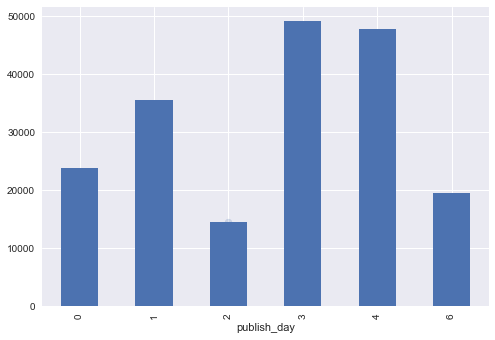

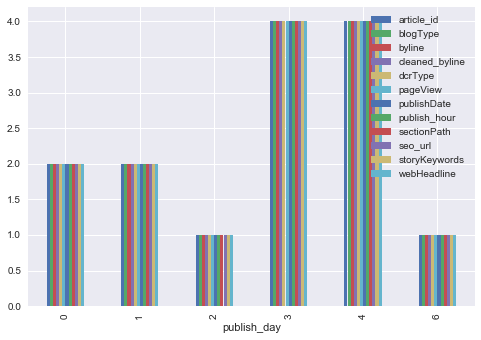

In [283]:
low_hits=original_data[(original_data.pageView < 20000) & (original_data.pageView > 10000)]
# pivot=pd.pivot_table(low_hits, index=['sectionPath', "publish_day"], values="pageView", aggfunc=np.sum)
low_hits_features=low_hits[(low_hits['sectionPath'] != None)  & (low_hits['sectionPath'].str.contains("features") )]
plt.scatter(x=low_hits_features['publish_day'], y=low_hits_features['pageView'], alpha=0.2)
features_hits_pivot=pd.pivot_table(low_hits_features, index=[ "publish_day"], values="pageView", aggfunc=np.sum)
features_hits_pivot.plot(kind="bar")
features_hits_pivot.head()
# low_hits_features.groupby("publish_day").pageView.agg('sum')
# low_hits_features.head()

low_hits_features_pivot=pd.pivot_table(low_hits_features, index="publish_day", aggfunc=np.size)
low_hits_features_pivot.plot(kind="bar")

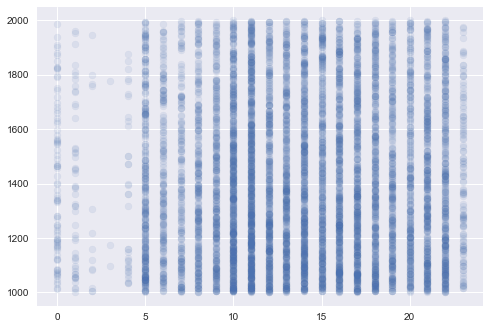

In [281]:
g = plt.scatter(x=low_hits['publish_hour'], y=low_hits['pageView'], alpha=0.1)

TypeError: lmplot() missing 2 required positional arguments: 'x' and 'y'

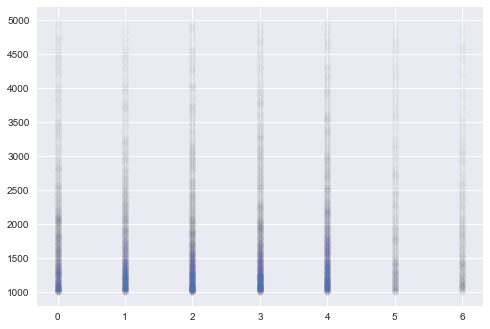

In [179]:
g = plt.scatter(x=low_hits['publish_day'], y=low_hits['pageView'], alpha=0.005) 
sns.lmplot( data=low_hits, col="publish_day", row="pageView")

In [175]:
plot_breaking = agate.Table.from_csv('breaking-news.csv',encoding = "ISO-8859-1")